# SVD

In [34]:
from numpy.linalg import svd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

def center(M):
    avgs = np.sum(M, axis=0) / M.shape[0]
    Mc = M - avgs
    return Mc

## Зададим какую-то разреженную матрицу

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  4.7 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  

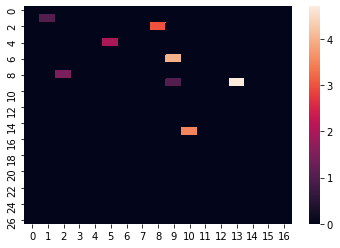

In [80]:
USERS = 27
ITEMS = 17
M = np.zeros((USERS, ITEMS))
M[1, 1] = 1
M[4, 5] = 2
M[2, 8] = 3
M[8, 2] = 1.5
M[9, 9] = 1
M[6, 9] = 4
M[9, 13] = 4.7
M[15, 10] = 3.5

print(M)
sn.heatmap(M)

## Найдём главную компоненту в данных

(27, 27) (27, 17) (17, 17)
[ 0.04603528  0.04808924  0.07478141  0.04603528  0.05552074  0.04603528
 -0.34246045  0.04603528  0.05092965 -0.90411954  0.04603528  0.04603528
  0.04603528  0.04603528  0.04603528  0.09655332  0.04603528  0.04603528
  0.04603528  0.04603528  0.04603528  0.04603528  0.04603528  0.04603528
  0.04603528  0.04603528  0.04603528]


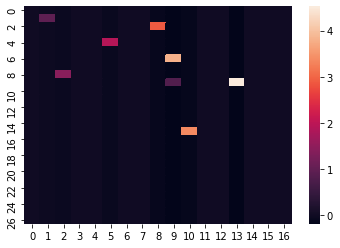

In [84]:
U, sigma, V = svd(center(M))
S = np.zeros((U.shape[0], V.shape[1]))
S[:len(sigma),:len(sigma)] = np.diag(sigma)
print(U.shape, S.shape, V.shape)
pc1 = U[:, 0]
print(pc1)
sn.heatmap(U @ S @ V)

U~(27, 17) S~(17, 17) V~(17, 17)
Approximation


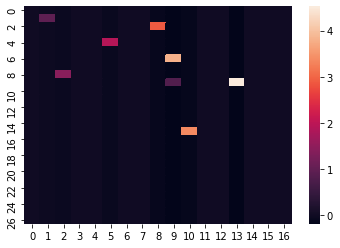

Difference


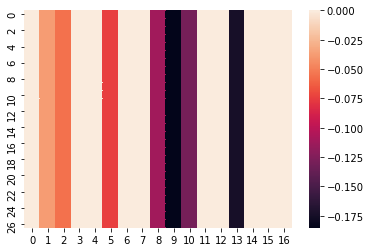

U~(27, 10) S~(10, 10) V~(10, 17)
Approximation


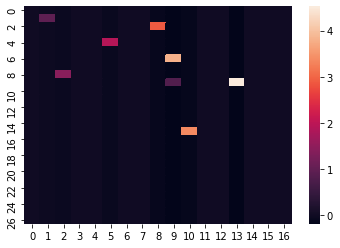

Difference


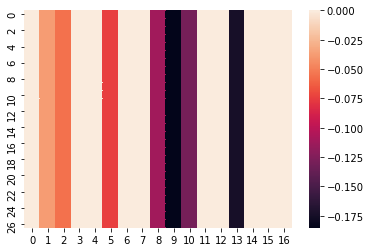

U~(27, 7) S~(7, 7) V~(7, 17)
Approximation


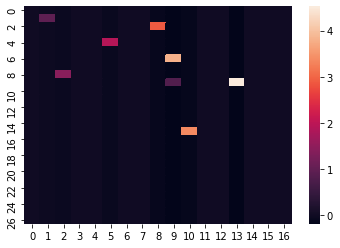

Difference


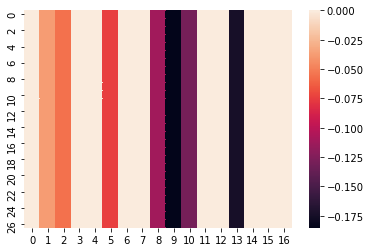

U~(27, 5) S~(5, 5) V~(5, 17)
Approximation


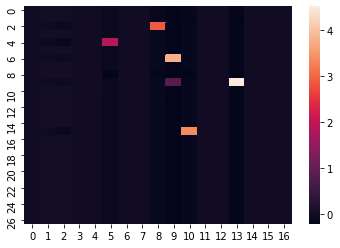

Difference


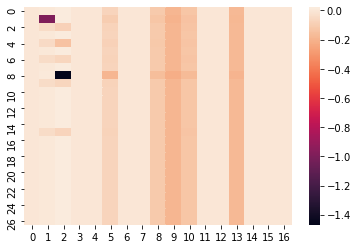

U~(27, 4) S~(4, 4) V~(4, 17)
Approximation


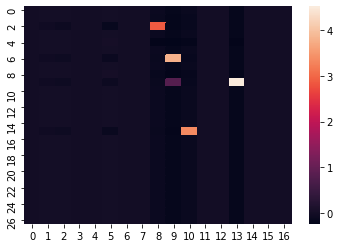

Difference


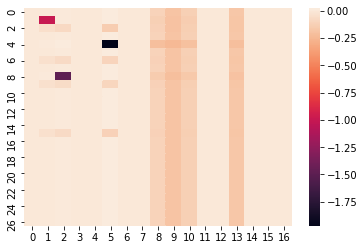

U~(27, 2) S~(2, 2) V~(2, 17)
Approximation


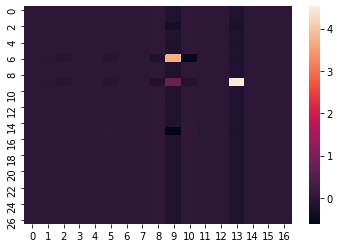

Difference


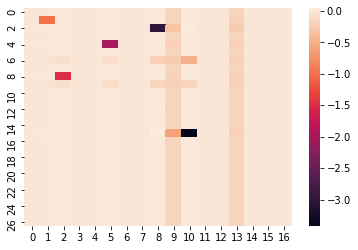

In [88]:
for r in [17, 10, 7, 5, 4, 2]:
    U_ = U[:, :r]
    S_ = np.diag(sigma)[:r, :r]
    V_ = V[:r, :]
    print(f"U~{U_.shape} S~{S_.shape} V~{V_.shape}")
    print("Approximation")
    sn.heatmap((U_ @ S_ @ V_))
    plt.show()
    print("Difference")
    sn.heatmap((U_ @ S_ @ V_)  - M)
    plt.show()

## Немножечко изменим матрицу в одном месте (1 пользователь поставил оценку)

In [93]:
for val in [0, 1, 3, 5, 7, 15]:
    M[6, 5] = val
    U, sigma, V = svd(center(M))
    pc2 = U[:, 0]
    print(f"For value {val} vectors dot product is {pc1.T @ pc2}")

For value 0 vectors dot product is 1.0000000000000009
For value 1 vectors dot product is -0.9988539245025918
For value 3 vectors dot product is -0.782442383993075
For value 5 vectors dot product is 0.4593372698133528
For value 7 vectors dot product is -0.3932899997997
For value 15 vectors dot product is -0.35392147480548813


<hr>

# Вложения

In [12]:
from deeppavlov.core.common.file import read_json
from deeppavlov import build_model, configs

bert_config = read_json(configs.embedder.bert_embedder)
bert_config['metadata']['variables']['BERT_PATH'] = 'C:/dev/models/rubert_cased_L-12_H-768_A-12_pt'
m = build_model(bert_config)

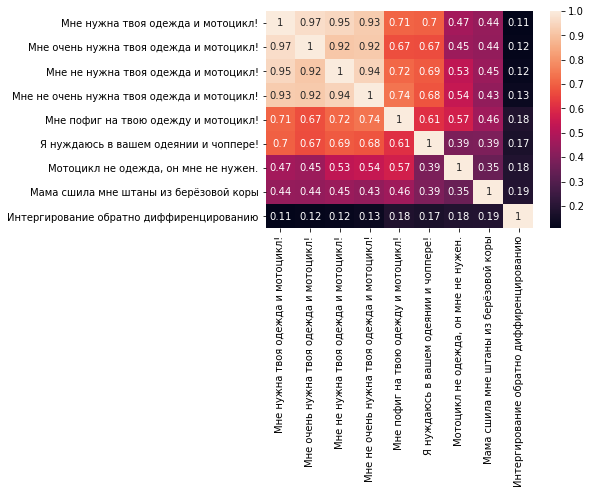

In [29]:


texts = [
    'Мне нужна твоя одежда и мотоцикл!',
    'Мне очень нужна твоя одежда и мотоцикл!',
    'Мне не нужна твоя одежда и мотоцикл!',
    'Мне не очень нужна твоя одежда и мотоцикл!',
    'Мне пофиг на твою одежду и мотоцикл!',
    'Я нуждаюсь в вашем одеянии и чоппере!',
    'Мотоцикл не одежда, он мне не нужен.',
    'Мама сшила мне штаны из берёзовой коры',
    'Интергирование обратно диффиренцированию'
]

embeddings = []
for text in texts:
    tokens, token_embs, subtokens, subtoken_embs, sent_max_embs, sent_mean_embs, bert_pooler_outputs = m([text])
    embeddings.append(sent_mean_embs.reshape(-1))

sn.heatmap(cosine_similarity(embeddings, embeddings), annot=True, xticklabels=texts, yticklabels=texts)
plt.show()

# пройти по 1 столбцу